## Description
### Local binary patterns
Local binary patterns (LBP) is a type of visual descriptor used for classification in computer vision. LBP is the particular case of the Texture Spectrum model proposed in 1990. LBP was first described in 1994. It has since been found to be a powerful feature for texture classification; it has further been determined that when LBP is combined with the Histogram of oriented gradients (HOG) descriptor, it improves the detection performance considerably on some datasets. A comparison of several improvements of the original LBP in the field of background subtraction was made in 2015 by Silva et al. A full survey of the different versions of LBP can be found in Bouwmans et al.

### Dataset
The MPLab GENKI Database is an expanding database of images containing faces spanning a wide range of illumination conditions, geographical locations, personal identity, and ethnicity. Each subsequent release  contains all images from the previous release, and so is guaranteed to be backward compatible. The database of images is divided into overlapping subsets, each with its own labels and descriptions. For example, the GENKI-4K subset contains 4000 face images labeled as either “smiling” or “non-smiling” by human coders.  The pose of the faces is approximately frontal as determined by our automatic face detector. The GENKI-SZSL subset contains 3500 images containing faces. They are labeled for the face location and size. The images are available for public use.

The current release of the GENKI database is GENKI-R2009a. It contains 7172 unique image files, which
combine to form these subsets:

    GENKI-4K: 4000 images, containing expression and head-pose labels.
    GENKI-SZSL: 3500 images, containing face position and size labels.

Each image file has a unique name. Each subset consists of an “Images” text file and a “Labels” text file. The Images file has one image name per line. The corresponding line in the Labels file contains the data label for that file.

The current public release of The MPLab GENKI Database is available for download :
https://inc.ucsd.edu/mplab/databases/GENKI-R2009a.zip

In [50]:
# ! cd "dataset"; wget "https://inc.ucsd.edu/mplab/databases/GENKI-R2009a.zip"; unzip GENKI-R2009a.zip
# ! ls '/content/drive/MyDrive/dataset/GENKI/GENKI-R2009a'

In [2]:
import os
import cv2 as cv
import numpy as np
from skimage.io import imread, imshow
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import pickle
import joblib

In [16]:
# AddrDatset= '/content/drive/MyDrive/dataset/GENKI/GENKI-R2009a/'
AddrDatset= '/content/dataset/GENKI-R2009a/'

In [12]:
def load_images_from_folder(list_image_file):
    images = [] 
    kernel=20
    for filename in list_image_file:
        img= cv.imread( AddrDatset+"files/"+filename ,0)
        img= cv.resize(img, (300, 300))
        
        x,x2,y,y2= 0,0,0,0
        w,h = kernel, kernel
        size= (img.shape[0]//kernel)**2
        for i in range(1):
            img[x:x2+h, y:y+h]= cv.GaussianBlur(img[x:x2+h, y:y+h], (5,5), 0.9)
            x2+=w
            if(x2>=img.shape[0]):
                x2=0; x+=0; y+=h
                
        if img is not None:
            images.append(img)
    return np.array(images) 

In [17]:
list_image_file = open(AddrDatset+"GENKI-4K_Images.txt", "r").read().splitlines()
lables= open(AddrDatset+"GENKI-4K_Labels.txt", "r", encoding="UTF8").readlines()
lables= np.array( [i.split(' ', 1)[0] for i in lables] )[:]
image= load_images_from_folder(list_image_file[:])

(300, 300)


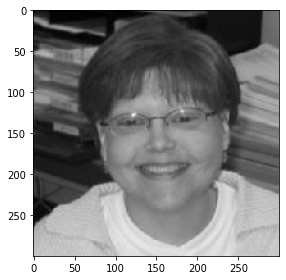

In [18]:
print(image[0].shape)
imshow(image[0]);

In [19]:
def get_LBP(img_list):
    ximage=[]
    radius= 3
    n_points= 8 * radius
    METHOD= 'uniform'
    kernel=50
    for img in img_list:
        lbp = local_binary_pattern(img, n_points, radius, METHOD);
        img= cv.normalize(lbp, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
        ximage.append(img.flatten())
    
    return ximage

image_lbp= get_LBP(image)

In [20]:
X_train, X_test, Y_train, Y_test= train_test_split(image_lbp, lables, random_state=42)

In [21]:
svc= SVC(kernel='rbf')
svc.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
Y_pred= svc.predict(X_test)

In [23]:
print(confusion_matrix(Y_test, Y_pred))
print("\nClassification report for - \n{}:\n{}\n".format( svc, metrics.classification_report(Y_test, Y_pred)))

[[119 324]
 [108 449]]

Classification report for - 
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.52      0.27      0.36       443
           1       0.58      0.81      0.68       557

    accuracy                           0.57      1000
   macro avg       0.55      0.54      0.52      1000
weighted avg       0.56      0.57      0.53      1000




In [24]:
accuracy_score(Y_test, Y_pred)

0.568

In [25]:
joblib.dump(svc, 'GENKI_LBP_SVM.sav')

['GENKI_LBP_SVM.sav']